In [1]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,n_features = 2, centers=4, random_state=32, cluster_std=1.5)

import pandas as pd

df = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"Y":y})
df.head(5)

,X1,X2,Y
0,8.362801,-1.411925,0
1,7.167865,-1.037636,0
2,-10.683035,7.443676,3
3,10.362519,-0.627126,0
4,3.621164,-3.454718,0


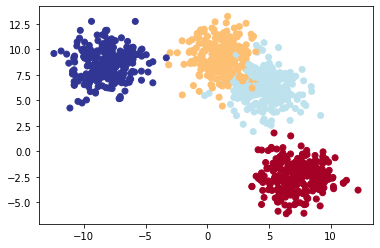

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.RdYlBu)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
X = torch.from_numpy(X).type(torch.LongTensor)
y = torch.from_numpy(y).type(torch.LongTensor).unsqueeze(dim = 1)
split_percentage = int(0.8*len(X))
X_train , y_train = X[:split_percentage], y[:split_percentage]
X_test,y_test = X[split_percentage:], y[split_percentage:]

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print(y_train.shape)

torch.Size([800, 1])


In [6]:
class blob_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=2,out_features=20)
        self.linear_layer2 = nn.Linear(in_features=20,out_features=15)
        self.linear_layer3 = nn.Linear(in_features=15,out_features=10)
        self.linear_layer4 = nn.Linear(in_features=10,out_features=4)
        self.relu = nn.ReLU()
        
    def  forward(self,x : torch.tensor) -> torch.Tensor:
        return self.linear_layer4(self.relu(self.linear_layer3(self.relu(self.linear_layer2(self.relu(self.linear_layer1(x)))))))

In [7]:
model = blob_model()
model.state_dict()

OrderedDict([('linear_layer1.weight',
              tensor([[-3.7563e-01,  1.4930e-01],
                      [-2.9699e-01,  2.7651e-01],
                      [-4.6188e-01, -4.4908e-01],
                      [ 5.9176e-01, -6.5049e-01],
                      [ 3.0335e-01, -1.1845e-01],
                      [ 1.2202e-02,  6.2268e-01],
                      [-6.4672e-01, -3.3810e-01],
                      [-4.8465e-01,  2.0462e-02],
                      [ 1.9090e-01, -5.1352e-01],
                      [-2.4011e-01,  5.1873e-01],
                      [-4.6412e-01,  6.1219e-01],
                      [-7.5069e-02, -6.2080e-01],
                      [ 3.4584e-01, -2.0107e-01],
                      [-3.1315e-04,  5.5269e-01],
                      [-4.9755e-01, -4.3952e-01],
                      [-6.3788e-02, -3.6640e-01],
                      [ 5.9331e-01,  1.0011e-01],
                      [ 5.5433e-01, -2.4192e-01],
                      [ 1.0798e-02, -6.1403e-01],
            

In [8]:
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model.parameters(),lr = 0.01)

In [9]:
def accuracy_fn(y_pred, y_true):
   correct = torch.eq(y_true,y_pred).sum().item()
   acc = (correct/len(y_pred)) * 100
   return acc








In [10]:
torch.unique(y_train)

tensor([0., 1., 2., 3.])

In [25]:
with torch.inference_mode():
        y_logits_test = model(X_test)
        print(y_logits_test[:5])
        # yy1 = torch.max(y_logits_test,dim = 1)
        # print(yy1[0].shape)
        print(y_test[:5].squeeze(dim = 1))
        y_test_indices = torch.argmax(y_test, dim=1)
        print(y_test_indices[:105])

        print(torch.softmax(y_logits_test,dim =0)[:5])
        y_preds2 = torch.softmax(y_logits_test,dim =0).argmax(dim = 1)
        print(y_preds2[:5])
       
        loss2 = loss(y_logits_test,y_test.squeeze(dim = 1).type(torch.LongTensor))
        

tensor([[ 6.5564e-02,  2.2109e-01, -2.5775e-01,  5.9653e-01],
        [ 6.2398e-02,  2.1206e-01, -2.5415e-01,  5.8801e-01],
        [ 4.4670e-04,  8.4518e-02, -1.9514e-01,  4.5355e-01],
        [-1.0294e-01, -2.7871e-02, -1.4565e-01,  2.6764e-01],
        [-8.0834e-02,  2.3090e-02, -1.7383e-01,  3.2976e-01]])
tensor([1., 3., 1., 0., 2.])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([[0.0053, 0.0054, 0.0048, 0.0056],
        [0.0053, 0.0053, 0.0048, 0.0056],
        [0.0050, 0.0047, 0.0051, 0.0049],
        [0.0045, 0.0042, 0.0053, 0.0040],
        [0.0046, 0.0044, 0.0052, 0.0043]])
tensor([3, 3, 2, 2, 2])


In [33]:
torch.manual_seed(42)
epochs  = 100
epoch_set = []
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
    # yy = torch.max(y_preds,dim = 1)
    #tt = torch.max(y_preds,dim = 1)
    #print(tt[0])
   
    
    

  
    y_preds1 = torch.softmax(y_preds,dim = 1).argmax(dim = 1)
    loss1 = loss(y_preds,y_train.squeeze(dim = 1).type(torch.LongTensor))#yy[0].unsqueeze(dim = 1).type(torch.float32)
    
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    model.eval()
    epoch_set.append(epoch)
    train_loss.append(loss1.item())
    train_acc = accuracy_fn(y_preds1,y_train.squeeze(dim = 1).type(torch.LongTensor))
    train_accuracy.append(train_acc)
    with torch.inference_mode():
        y_logits_test = model(X_test)
        # yy1 = torch.max(y_logits_test,dim = 1)
        
        y_preds2 = torch.softmax(y_logits_test,dim = 1).argmax(dim = 1)
        loss2 = loss(y_logits_test,y_test.squeeze(dim = 1).type(torch.LongTensor))
        
        test_loss.append(loss2.item())
       
        test_acc = accuracy_fn(y_preds2,y_test.squeeze(dim = 1).type(torch.LongTensor))
        test_accuracy.append(test_acc)
    print("Epoch: {}, Train Loss: {}, Train acc: {} , Test Loss: {} , Test acc: {}".format(epoch,loss1.item(),train_acc,loss2.item(),test_acc))
    
# print(y_preds2[:5])
# print(y_test[:5].squeeze(dim = 1).type(torch.LongTensor))
    
    

Epoch: 0, Train Loss: 0.05740346387028694, Train acc: 97.625 , Test Loss: 0.10717446357011795 , Test acc: 96.0
Epoch: 1, Train Loss: 0.05740100517868996, Train acc: 97.5 , Test Loss: 0.1084463819861412 , Test acc: 95.5
Epoch: 2, Train Loss: 0.057388924062252045, Train acc: 97.625 , Test Loss: 0.10812503099441528 , Test acc: 95.5
Epoch: 3, Train Loss: 0.05738091468811035, Train acc: 97.5 , Test Loss: 0.10840757191181183 , Test acc: 95.5
Epoch: 4, Train Loss: 0.05737161263823509, Train acc: 97.625 , Test Loss: 0.10868620872497559 , Test acc: 95.5
Epoch: 5, Train Loss: 0.05736005678772926, Train acc: 97.625 , Test Loss: 0.10778852552175522 , Test acc: 95.5
Epoch: 6, Train Loss: 0.05734420195221901, Train acc: 97.5 , Test Loss: 0.10863364487886429 , Test acc: 95.5
Epoch: 7, Train Loss: 0.057363368570804596, Train acc: 97.625 , Test Loss: 0.10792548209428787 , Test acc: 95.5
Epoch: 8, Train Loss: 0.05736881121993065, Train acc: 97.5 , Test Loss: 0.1086035743355751 , Test acc: 95.5
Epoch: 9,

torch.Size([1, 800, 2]) torch.Size([800])


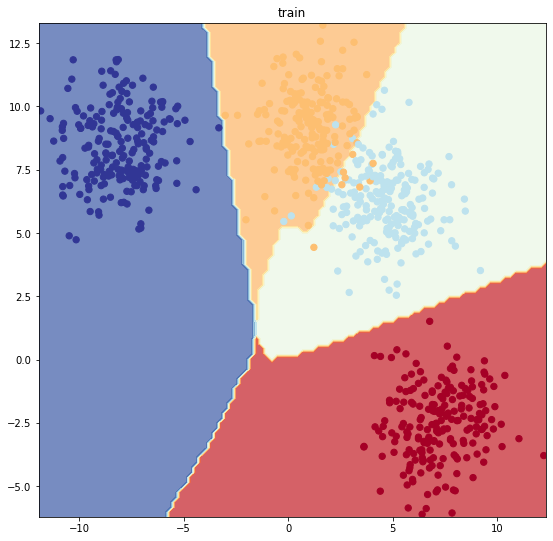

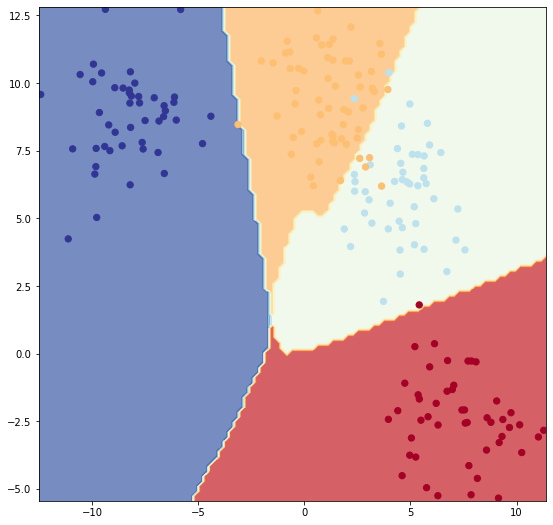

In [35]:
from helper import plot_decision_boundary,plot_predictions
print(X_train.unsqueeze(dim = 0).shape , y_train.squeeze(dim = 1).shape)
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title("train")
plot_decision_boundary(model,X=X_train,y = y_train.squeeze(dim = 1))
plt.figure(figsize=(20,20))
plt.subplot(2,2,3)
plot_decision_boundary(model,X = X_test,y = y_test.squeeze(dim = 1))
 


![Screenshot from 2023-07-30 11-43-55.png](<attachment:Screenshot from 2023-07-30 11-43-55.png>)
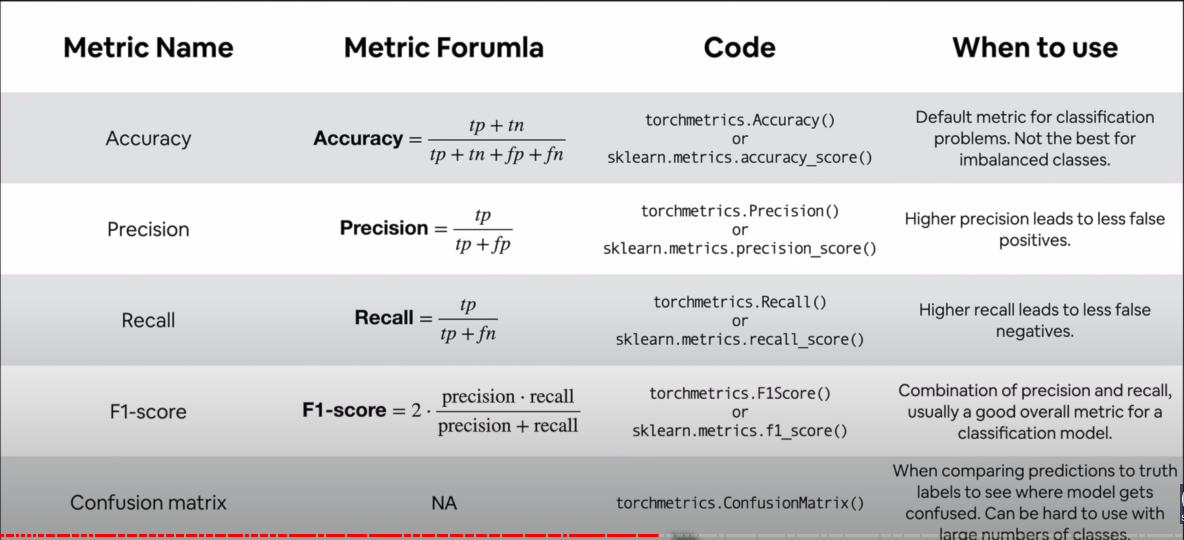